# Visualizing fire scares through false color 
### Author: Isabella Segarra 

### Objective:

### About the data:
Fire permimeter data is from https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about 

Landsat data is an `xarray.Dataset`


In [1]:
# Environment set-up 
import pandas as pd # for data wrangling
import numpy as np  # for data wrangling
import geopandas as gpd
import os # for data import
import matplotlib.pyplot as plt  # for visualizations 
import xarray as xr # for Netcdf4 data 
import rioxarray as rio

### Data Import

In [2]:
# Import fire perimeter data
fp_eaton = os.path.join('data', 'Eaton_Perimeter_20250121')
eaton_perim = gpd.read_file(fp_eaton)

fp_palisades = os.path.join('data','Palisades_Perimeter_20250121')
palisades_perim = gpd.read_file(fp_palisades)

In [3]:
# Import Landsat data
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

## Fire perimeter data exploration 
In this section I will do some preliminary exploration of the fire data. Since this is geospatial data, I will do the following:
- check the *CRS* of each dataset 
- check if the data is projected 
- check if the data is multipolygon or polygon 

In [4]:
# Eaton fire perimeter

print('CRS:', eaton_perim.crs)
print('Is geographic?:', eaton_perim.crs.is_geographic)
print('Is projected?:', eaton_perim.crs.is_projected)
print('Is geometry polygon?:', eaton_perim.geom_type)

# Palisades fire perimeter
print('CRS:', palisades_perim.crs)
print('Is geographic?:', palisades_perim.crs.is_geographic)
print('Is projected?:', palisades_perim.crs.is_projected)
print('Is geometry polygon?:', palisades_perim.geom_type)

# Assert that they match 
eaton_perim.crs == palisades_perim.crs

CRS: EPSG:3857
Is geographic?: False
Is projected?: True
Is geometry polygon?: 0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
5     Polygon
6     Polygon
7     Polygon
8     Polygon
9     Polygon
10    Polygon
11    Polygon
12    Polygon
13    Polygon
14    Polygon
15    Polygon
16    Polygon
17    Polygon
18    Polygon
19    Polygon
dtype: object
CRS: EPSG:3857
Is geographic?: False
Is projected?: True
Is geometry polygon?: 0     Polygon
1     Polygon
2     Polygon
3     Polygon
4     Polygon
5     Polygon
6     Polygon
7     Polygon
8     Polygon
9     Polygon
10    Polygon
11    Polygon
12    Polygon
13    Polygon
14    Polygon
15    Polygon
16    Polygon
17    Polygon
18    Polygon
19    Polygon
20    Polygon
dtype: object


True

**Exploration Findings**

From my preliminary exploration, I see that both datasets have matching coordinate refrene systems, are both projected, and all have polygon geometries. 

## Landsat data exploration 
In this section I will do some preliminary exploration of landsat data. I will 
- view the attributes, dimensions, and variables of the data
- check the CRS of the data
- 

In [5]:
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

**Exploration findings**

The `landsat` data contains coordinates (x,y) with time (z). The variables correspond to wavelenngths red, gree, blue, near infared (nir), short wave infared(swir22), and a spatial refrence variable  with information relating to the cooordinate refrence system and datum. The CRS for this dataset is 32611, which does not match the Eaton and Palisades fire perimeters. 

## Restoring geospatial information

In [6]:
# Print the CRS of landsat
print(landsat.rio.crs)

None


In [7]:
# View the landsat crs by accessing it through the spatial_ref attribute
landsat.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [8]:
# Recover geospatial information
landsat.rio.write_crs(3857, inplace=True) # 3857 to match the fire permieter data CRS

# Confirm CRS 
print(landsat.rio.crs)

EPSG:3857


## True color imagery

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


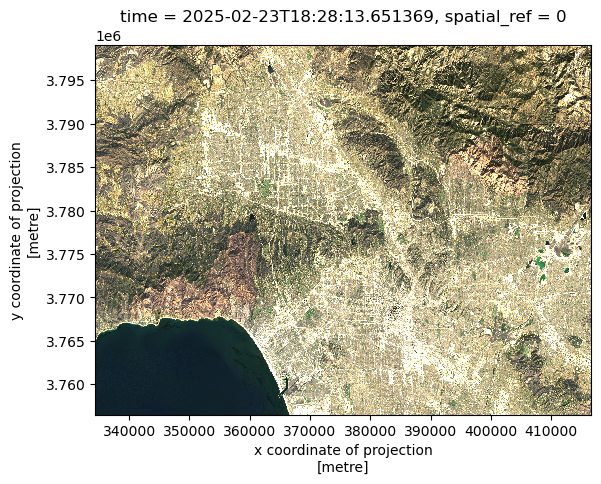

In [9]:
# Plot the red, blue, and green bands of the landsat data 
landsat[['red', 'green', 'blue']].to_array().plot.imshow(vmin= 7000, vmax=12200)

In [10]:
# Check for NA values in bands
landsat[['red', 'green', 'blue']].to_array().isnull()

<xarray.DataArray (variable: 3, y: 1418, x: 2742)> Size: 12MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
  * variable     (variable) object 24B 'red' 'green' 'blue'

In [11]:
# fill in nas with zeros
rgb_image_2 = landsat[['red', 'green', 'blue']].to_array().fillna(0)

Text(0, 0.5, 'Northing (m)')

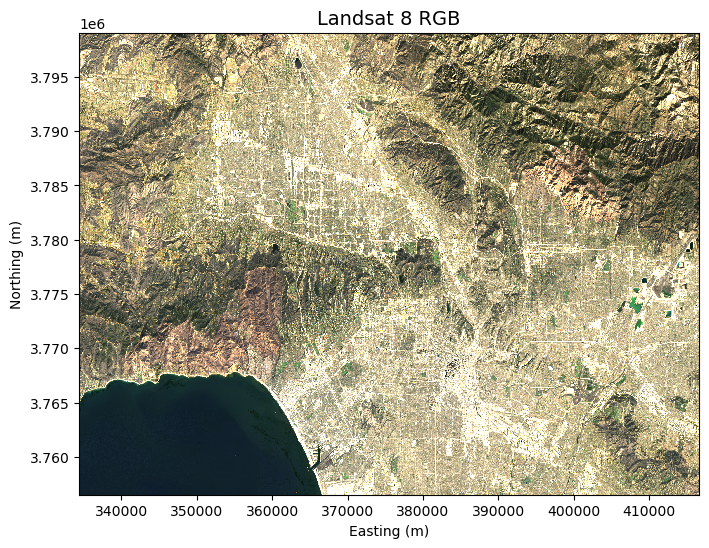

In [12]:
# Plot figure 
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 

rgb_image_2.plot.imshow( # add landsat data
    vmin= 7000, vmax=12200, # adjust the darkness (vmin) and brightness (vmax) levels
    ax=ax,
)

ax.set_title("Landsat 8 RGB", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")



**Map 1 vs. Map 2** 

## False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

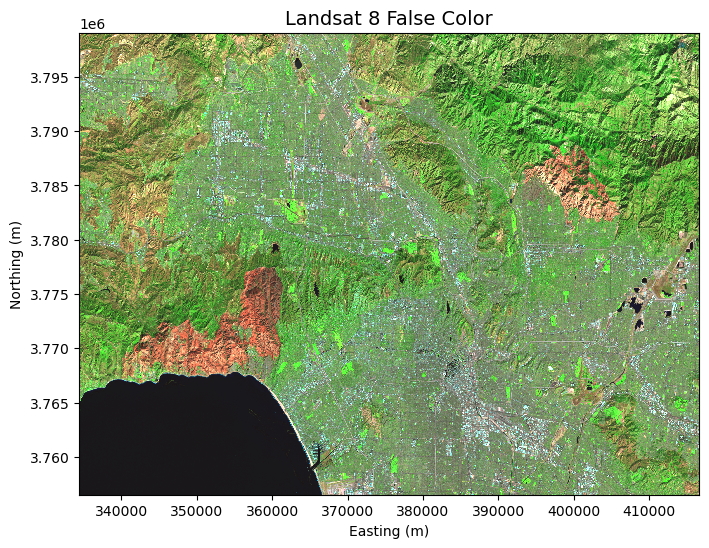

In [ ]:
# Plot figure 
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow( # add landsat data
    vmin= 6000, vmax=19000, # adjust the darkness (vmin) and brightness (vmax) levels
    ax=ax,
)

ax.set_title("Landsat 8 False Color", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")



<Axes: >

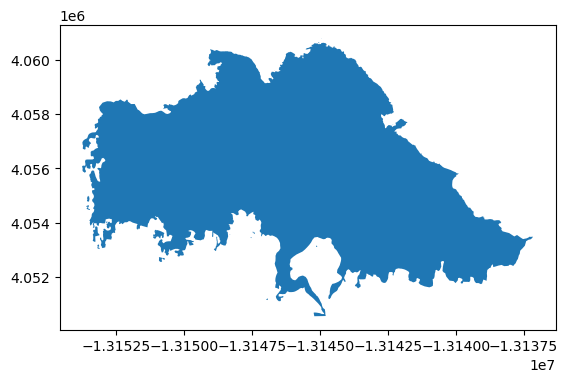

In [39]:
eaton_perim.plot()

<Axes: >

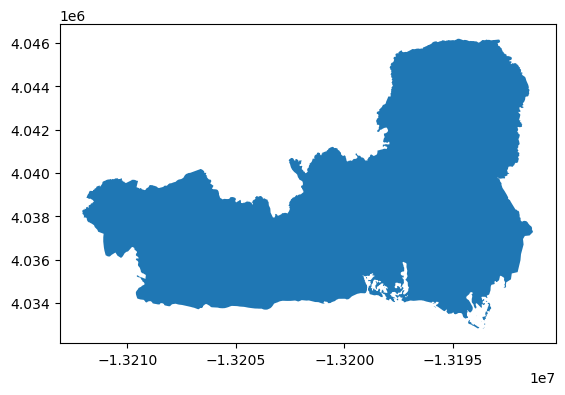

In [40]:
palisades_perim.plot()

Text(62.597222222222214, 0.5, 'Northing (m)')

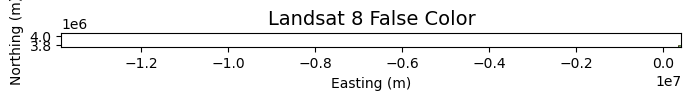

In [43]:
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow( # add landsat data
    vmin= 6000, vmax=19000, # adjust the darkness (vmin) and brightness (vmax) levels
    ax=ax,
)
eaton_perim.plot(ax=ax)

ax.set_title("Landsat 8 False Color", fontsize=14)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")

<Axes: >

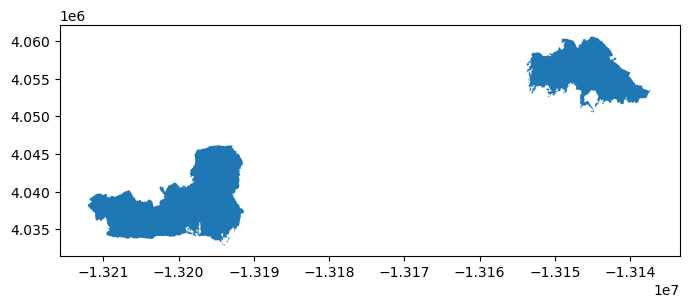

In [48]:
fig, ax = plt.subplots(figsize=(8, 6)) 
eaton_perim.plot(ax=ax)
palisades_perim.plot(ax=ax)